# I Solving the Sum of Two Digits Programming Challenge

## C++

In [ ]:
%%writefile APlusB.cpp
#include <iostream>

int sum_of_two_digits(int first_digit, int second_digit) {
    return first_digit + second_digit;
}

int main() {
    int a = 0;
    int b = 0;
    std::cin >> a;
    std::cin >> b;
    std::cout << sum_of_two_digits(a, b);
    return 0;
}

Writing APlusB.cpp


In [ ]:
!g++ APlusB.cpp -o APlusB
!./APlusB

^C


### Test input output files

In [ ]:
%%writefile input1.txt
4 8

Writing input1.txt


In [ ]:
%%writefile output1.txt
12

Writing output1.txt


In [ ]:
%%writefile input2.txt
-5 9

Writing input2.txt


In [ ]:
%%writefile output2.txt
4

Writing output2.txt


In [ ]:
!./APlusB < input1.txt

12

In [ ]:
!./APlusB < input2.txt

4

### Comparing files with grep

https://askubuntu.com/questions/546796/comparing-two-text-files

In [ ]:
!grep -xvFf output1.txt output1.txt 

In [ ]:
!grep -xvFf output1.txt output2.txt 

4


In [ ]:
!grep -xvFf output2.txt output1.txt 

12


In [ ]:
!./APlusB < input1.txt> ctest1.txt
!grep -xvFf output1.txt ctest1.txt

In [ ]:
!./APlusB < input2.txt > ctest2.txt
!grep -xvFf output2.txt ctest2.txt

## Python

In [ ]:
%%writefile sum.py
# python3

def sum_of_two_digits(first_digit, second_digit):
    return first_digit + second_digit

if __name__ == '__main__':
    a, b = map(int, input().split())
    print(sum_of_two_digits(a, b))

Writing sum.py


In [ ]:
!python sum.py

^C
Traceback (most recent call last):
  File "sum.py", line 7, in <module>
    a, b = map(int, input().split())
KeyboardInterrupt


In [ ]:
!python sum.py  < input1.txt> ptest1.txt
!grep -xvFf output1.txt ptest1.txt

In [ ]:
!python sum.py  < input2.txt> ptest2.txt
!grep -xvFf output2.txt ptest2.txt

# II Solving The Maximum Pairwise Product Programming Challenge in C++

## C++

In [ ]:
%%writefile max_pairwise_product.cpp
#include <iostream>
#include <vector>
#include <algorithm>

int MaxPairwiseProduct(const std::vector<int>& numbers) {
    int max_product = 0;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
            max_product = std::max(max_product,
                numbers[first] * numbers[second]);
        }
    }

    return max_product;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}


Writing max_pairwise_product.cpp


In [ ]:
!g++ max_pairwise_product.cpp -o max_pairwise_product
!./max_pairwise_product

^C


### Test 1: Small numbers

In [ ]:
%%writefile input1.txt
10
1 2 3 4 5 6 7 8 9 10

Writing input1.txt


In [ ]:
!./max_pairwise_product < input1.txt

/bin/bash: ./max_pairwise_product: No such file or directory


### Test 2: largest input numbers 200000 200000 in the input

In [ ]:
%%writefile input2.txt
6
1 3 200000 9 200000 23

Writing input2.txt


In [ ]:
!./max_pairwise_product < input2.txt

/bin/bash: ./max_pairwise_product: No such file or directory


Changing the variables to long long

In [ ]:
%%writefile max_pairwise_product_long.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers) {
    long long max_product = 0LL;
	  long long aux_product = 0LL;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
			       aux_product =  (long long) numbers[first] * numbers[second];
            if ( max_product < aux_product)  {
				        max_product = aux_product;
             }
        }
    }

    return max_product;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}


Overwriting max_pairwise_product_long.cpp


In [ ]:
!g++ max_pairwise_product_long.cpp -o max_pairwise_product_long
!./max_pairwise_product_long < input1.txt
!./max_pairwise_product_long < input2.txt

90
40000000000


### Test 3  stress tests 20  times  random n in [2, 20] 

In [ ]:
import random as rd
n = list(range(2, 21))
for i in range(20):
  random_1, random_2 = rd.choices(n, k=2)
  with open('random_ex.txt', 'w') as f:
    f.write("2\n")
    f.write(f"{random_1} {random_2}")
  !./max_pairwise_product_long < random_ex.txt

99
96
98
140
168
14
280
27
24
15
100
52
200
280
270
304
26
204
323
85


### Test 4  time test  measure the execution time running with the the largest worst case file (200000 increasing numbers, 200000 and 200000 the end) 

In [ ]:
%%writefile Test2Write.cpp

#include <iostream>
#include <fstream>
#include <cstdlib>

using namespace std;

int main() {
  // Create and open a text file
  ofstream MyFile("input3.txt");

 MyFile << 200000 <<"\n";  // n 
 for (int i=1; i < 200001; i++){
     MyFile << i <<" ";
 }
  
  // Close the file
  MyFile.close();
}

Overwriting Test2Write.cpp


In [ ]:
!g++ Test2Write.cpp -o Test2Write
!./Test2Write

Measure time

https://askubuntu.com/questions/53444/how-can-i-measure-the-execution-time-of-a-terminal-process

In [ ]:
!g++ max_pairwise_product_long.cpp -o max_pairwise_product_long
!time ./max_pairwise_product_long < input3.txt

39999800000
./max_pairwise_product_long < input3.txt  81.88s user 0.23s system 99% cpu 1:22.55 total


##### Calculate  the number of instructions executed by the algorithm as a function of n, add in each line a comment with the number of instructions that are executed in that line 

```cpp
 int main() {                         //N inst exec by line executed  
   
    int n;                            //1                      
    std::cin >> n;                    //1
                                              
    std::vector<int> numbers(n);      //n    init vector
    .
    .
 }

```

In [ ]:
%%writefile test_init_vectors.cpp
#include <iostream>
#include <vector>
#include <algorithm>
int main() {                                                               
    int n = 10;                                                                                                                            //1
    std::vector<int> numbers(n);                                            
    for (int i = 0; i < n; ++i) {                                           
        std::cout << numbers[i];                                             
    }

    std::cout << "\n";                       
    return 0;                                                              
}  

Writing test_init_vectors.cpp


In [ ]:
!g++ test_init_vectors.cpp -o test_init_vectors
!./test_init_vectors

0000000000


In [ ]:
%%writefile max_pairwise_product_long.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers) {              //N inst exec by line executed 
    long long max_product = 0LL;                                             //1                                          
	  long long aux_product = 0LL;                                             //1 
    int n = numbers.size();                                                  //1 
                                                                             
    for (int first = 0; first < n; ++first) {                                //1+2n  
        for (int second = first + 1; second < n; ++second) {                 //n + (n-1)n 
			       aux_product =  (long long) numbers[first] * numbers[second];    //(n-1)n/2 
            if (max_product < aux_product)  {                                //(n-1)n/2 
				        max_product = aux_product;                                   //[0, (n-1)n/2] 
             }
        }
    }
                                                                             // -------------- 
    return max_product;                                                      // 4 + 3n + [2(n-1)n, 2.5 (n-1)n] 
}

int main() {                                              //N inst exec by line executed 
    int n;                                                //1  
    std::cin >> n;                                        //1
    std::vector<int> numbers(n);                          //n
    for (int i = 0; i < n; ++i) {                         //1 + 2n
        std::cin >> numbers[i];                           //n
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";     //1 + 1  + 4 + 3n + [2(n-1)n, 2.5 (n-1)n]
    return 0;                                             // -------------- 
}                                                         // 9 + 7n + [2(n-1)n, 2.5 (n-1)n]


Overwriting max_pairwise_product_long.cpp


Count executed intructions in code and verify with inputs 1, 2 and 3

In [ ]:
%%writefile max_pairwise_product_long_execints.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers, long long &execints) {              //N inst exec by line executed 
    
    long long m = 0LL;                                                       //1
    
    long long max_product = 0LL;                                             //1
    execints++;

	  long long aux_product = 0LL;                                             //1
    execints++;

    int n = numbers.size();                                                  //1 
    execints++;

    execints++;                                                                         
    for (int first = 0; first < n; ++first) {                                //1+2n  
        execints += 2;

        long long m = 0LL;

        execints++;                                    
        for (int second = first + 1; second < n; ++second) {                 //n+ (n-1)n 
            execints += 2;                                                

			      aux_product =  (long long) numbers[first] * numbers[second];    //(n-1)n/2 
            execints++; 

            execints++; 
            if ( max_product < aux_product)  {                               //(n-1)n/2 
                       
				        max_product = aux_product;                                   //[0, (n-1)n/2] 
                execints++; 
                m++;
             }
        }
        if ( (first <= 10) || (n- first <= 10)) std::cout << m << "\n";
    }
                                                                            // -------------- 
    return max_product;                                                     // 4 + 3n + [2(n-1)n, 2.5 (n-1)n] 
}

int main() {                                                 //N inst exec by line executed 
    long long execints =0LL;

    int n;                                                   //1
    execints++;                                                              
    
    std::cin >> n;                                           //1
    execints++;

    std::vector<int> numbers(n);                             //n
    execints += n;
    
    execints++;
    for (int i = 0; i < n; ++i) {                            //1 + 2n
        execints += 2;

        std::cin >> numbers[i];
        execints++;                                          //n
    }
    
    //std::cout << MaxPairwiseProduct(numbers) << "\n";      //1 + 1  + 4 + 3n + [2(n-1)n, 2.5 (n-1)n]

    execints++;
    int M = MaxPairwiseProduct(numbers,execints);

    execints++;
    std::cout <<  execints << "\n";                       
    return 0;                                                // -------------- 
}                                                            // 9 + 7n + [2(n-1)n, 2.5 (n-1)n]

Writing max_pairwise_product_long_execints.cpp


In [ ]:
!g++ max_pairwise_product_long_execints.cpp -o max_pairwise_product_long_execints
!./max_pairwise_product_long_execints < input1.txt
!./max_pairwise_product_long_execints < input2.txt
!./max_pairwise_product_long_execints < input3.txt

9
5
4
3
2
2
2
2
1
0
289
2
1
2
0
0
0
116
199999
100000
66667
50000
40000
33334
28572
25000
22223
20000
18182
2
2
2
2
2
2
2
2
1
0
80003672077


The number of instructions executed by the algooirithm with a list of size $n$ is  

$$T = 9 + 7n + [2(n-1)n, 2.5 (n-1)n]$$

It depends on the size of the lists and  the order of the list.

For the input1.txt 
```
10
1 2 3 4 5 6 7 8 9 10
```
$$T = 9 + 7(10) + 2(9)(10) +  9 + 5 + 4 + 3 + 2 + 2 + 2 + 2 + 1 + 0  = 289 $$

For the input2.txt 
```
6
1 3 200000 9 200000 23
```
$$T = 9 + 7(6) + 2(5)(6)  +  2 + 1 + 2 + 0 + 0 + 0 = 116 $$


For the input3.txt that is the worst case (n=200000 and list in incresing order)

```
200000
1 2 3 4 5 6 7 8 9 10 ... 199998 199999 200000
```

$$
\begin{array}{ll}
T &= 9 + 7(200000) + (2)(199999)(200000)  + (199999 +
100000 + 66667 +50000 \cdots 2 + 2 + 1)\\
&= 80003672077  \\
  &< 9 + 7(200000) + (2.5)(199999)(200000) \\
  & = 100000900009
\end{array}
  $$

Calculate estimated time by instruction and number of instructions by second

In [ ]:
# Estimated time by instruction

128/80003672077 


1.5999265618308827e-09

In [ ]:
# Estimated number of instructions by second

1/(128/80003672077) 

625028688.1015625

### Efficient solution

Add in each line a coment with the number of intstrcution that are executed in that line

In [ ]:
%%writefile efficient_solution.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int> &numbers)
{
    long long max_product = 0;   //1
    int n = numbers.size();  //1
    int index_max_1 = -1;   //1
    int index_max_2 = -1;   //1

    for (int i = 0; i < n; ++i)     //1+2n
    {
        int current = numbers[i];   //1
        if (current > numbers[index_max_1])    //1
        {
            index_max_1 = i;    //1
        }
    }

    for (int i = 0; i < n; ++i)     //1+2n
    {
        if (i != index_max_1)
        {
            int current = numbers[i];   //1
            if (current > numbers[index_max_2])   //1
            {
                index_max_2 = i;   //1
            }
        }
    }
    max_product = (long long)numbers[index_max_1] * numbers[index_max_2];    //1
    return max_product;     //1+1+1+1+(1+2n)+(1+1+1)n+(1+2n)+(1+1+1)(n-1)+1=10n+4
}

int main()  //N inst exec by line executed 
{
    int n;  //1
    std::cin >> n;  //1
    std::vector<int> numbers(n);    //n
    for (int i = 0; i < n; ++i)     //1+2n
    {
        std::cin >> numbers[i];     //1
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n"; // 1 + 10n+4 + 1 = 10n + 6
    return 0; //    (4n+3) + (10n+6) = 14n+9
}


Writing efficient_solution.cpp


Test with inputs 1 and 2



In [ ]:
!g++ efficient_solution.cpp -o efficient_solution
!./efficient_solution < input1.txt
!./efficient_solution < input2.txt

90
40000000000


Test and time it with input 3

In [ ]:
!time ./efficient_solution < input3.txt

39999800000
./efficient_solution < input3.txt  0.38s user 0.00s system 98% cpu 0.392 total


20 stress tests

In [ ]:
%%writefile efficient_solution_stress_test.cpp
#include <iostream>
#include <cstdlib>
#include <vector>
using namespace std;

long long MaxPairwiseProduct(const std::vector<int> &numbers)
{
    long long max_product = 0;
    int n = numbers.size();
    int index_max_1 = -1;
    int index_max_2 = -1;

    for (int i = 0; i < n; ++i)
    {
        int current = numbers[i];
        if (current > numbers[index_max_1])
        {
            index_max_1 = i;
        }
    }

    for (int i = 0; i < n; ++i)
    {
        if (i != index_max_1)
        {
            int current = numbers[i];
            if (current > numbers[index_max_2])
            {
                index_max_2 = i;
            }
        }
    }
    max_product = (long long)numbers[index_max_1] * numbers[index_max_2];
    return max_product;
}

void coutInput(const std::vector<int> &numbers)
{
    int size = numbers.size();
    cout << size << endl;
    for (int i = 0; i < numbers.size(); ++i)
    {
        cout << numbers[i] << ' ';
    }
    cout << endl;
}

int main()
{
    srand((unsigned)time(NULL));

    for (int j = 0; j < 20; ++j)
    {
        int n = 1 + rand() % 10;

        vector<int> numbers(n);

        for (int i = 0; i < n; ++i)
        {
            int new_number = 1 + rand() % 1000;
            numbers[i] = new_number;
        }

        coutInput(numbers);

        std::cout << MaxPairwiseProduct(numbers) << endl;
    }
    return 0;
}

Overwriting efficient_solution_stress_test.cpp


Count executed instructions in code and verify with inputs 1,2 and 3


In [ ]:
%%writefile efficient_solution_count_instructions.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int> &numbers, long long &execints)
{
    long long max_product = 0; // 1
    execints++;
    int n = numbers.size(); // 1
    execints++;
    int index_max_1 = -1; // 1
    execints++;
    int index_max_2 = -1; // 1
    execints++;

    execints++;
    for (int i = 0; i < n; ++i) // 1+2n
    {
        execints += 2;

        execints++;
        int current = numbers[i]; // 1
        execints++;
        if (current > numbers[index_max_1]) // 1
        {
            execints++;
            index_max_1 = i; // 1
        }
    }

    execints++;
    for (int i = 0; i < n; ++i) // 1+2n
    {
        execints += 2;

        execints++;
        if (i != index_max_1)
        {
            execints++;
            int current = numbers[i];
            // 1
            execints++;
            if (current > numbers[index_max_2]) // 1
            {
                index_max_2 = i; // 1
                execints++;
            }
        }
    }

    execints++;
    max_product = (long long)numbers[index_max_1] * numbers[index_max_2]; // 1
    std::cout << "#Instructions: " << execints << std::endl;
    return max_product; // 1+1+1+1+(1+2n)+(1+1+1)n+(1+2n)+(1+1+1)(n-1)+1=10n+4
}

int main() // N inst exec by line executed
{
    long long execints = 0LL;

    int n; // 1
    execints++;

    std::cin >> n; // 1
    execints++;

    std::vector<int> numbers(n); // n
    execints += n;

    execints++;
    for (int i = 0; i < n; ++i) // 1+2n
    {
        execints += 2;

        std::cin >> numbers[i]; // 1
        execints++;
    }

    execints += 2;
    std::cout << MaxPairwiseProduct(numbers, execints) << "\n"; // 1 + 10n+4 + 1 = 10n + 6
    return 0;                                                   //    (4n+3) + (10n+6) = 14n+9
}

Overwriting efficient_solution_count_instructions.cpp


Calculate estimated time by instruction and number of instructions by second

In [ ]:
time_by_instruction = 0.38/2956223
instructions_by_second = 1/time_by_instruction
print(time_by_instruction)
print(instructions_by_second)

1.2854240021811615e-07
7779534.2105263155


### Super efficient solution

Whitout storing the list in memory and whitout calling a function, add in each line a coment with the number of intstrcution that are executed in that line 

In [ ]:
%%writefile super_efficient_solution.cpp
#include <iostream>
#include <vector>
#include <algorithm>

int main() // N inst exec by line executed
{
    int n;                       // 1
    std::cin >> n;               // 1
    int max1 = 0;
    int max2 = 0;

    for (int i = 0; i < n; ++i) // 1+2n
    {
        int current;
        std::cin >> current; // 1
        if (current > max1 || current > max2)
        {
            if (current > max1)
            {
                int t = max1;
                max1 = current;
                max2 = t;
            }
            else
            {
                max2 = current;
            }
        }
    }

    std::cout << (long long)max1 * max2 << "\n";
    return 0;
}

Overwriting super_efficient_solution.cpp


Test with inputs 1 and 2


 

In [ ]:
!g++ super_efficient_solution.cpp -o super_efficient_solution
!./super_efficient_solution < input1.txt
!./super_efficient_solution < input2.txt

90
40000000000


Test and time it with input 3

In [ ]:
!time ./super_efficient_solution < input3.txt

39999800000
./super_efficient_solution < input3.txt  0.37s user 0.00s system 98% cpu 0.378 total


20 stress tests 

In [ ]:
%%writefile super_efficient_solution_stress_test.cpp
#include <iostream>
#include <cstdlib>
#include <vector>
using namespace std;

int main()
{
    srand((unsigned)time(NULL));

    for (int j = 0; j < 20; ++j)
    {
        int n = 2 + rand() % 8;
        cout << n << endl;

        int max1 = 0;
        int max2 = 0;

        for (int i = 0; i < n; ++i)
        {
            int current = 1 + rand() % 1000;

            cout << current << '\t';

            if (current > max1 || current > max2)
            {
                if (current > max1)
                {
                    int t = max1;
                    max1 = current;
                    max2 = t;
                }
                else
                {
                    max2 = current;
                }
            }
        }
        cout << endl;

        cout << (long long)max1 * max2 << "\n";
    }
    return 0;
}

Overwriting super_efficient_solution_stress_test.cpp


Count executed instructions in code and verify with inputs 1,2 and 3

In [ ]:
%%writefile super_efficient_solution_count_instructions.cpp
#include <iostream>
#include <vector>
#include <algorithm>

int main() // N inst exec by line executed
{
    long long execints = 0LL;

    execints++;
    int n; // 1
    execints++;
    std::cin >> n; // 1
    execints++;
    int max1 = 0; // 1
    execints++;
    int max2 = 0; // 1

    execints++;
    for (int i = 0; i < n; ++i) // 1+2n
    {
        execints += 2;

        execints++;
        int current; // 1
        execints++;
        std::cin >> current; // 1
        execints += 2;
        if (current > max1 || current > max2) // 2
        {
            execints++;
            if (current > max1) // 1
            {
                execints++;
                int t = max1; // 1
                execints++;
                max1 = current; // 1
                execints++;
                max2 = t; // 1
            }
            else
            {
                execints++;
                max2 = current; // 1
            }
        }
    }

    execints += 3;
    std::cout << (long long)max1 * max2 << "\n"; // 3
    std::cout << "#Instructions: " << execints << std::endl;
    return 0; // 1 + 1 + 1 + 1 + (1 + 2n) + (1 + 1 + 2 + 1 + 1 + 1 + 1)n + 3
    // = 10n+8
}

Overwriting super_efficient_solution_count_instructions.cpp


In [ ]:
!g++ super_efficient_solution_count_instructions.cpp -o super_efficient_solution_count_instructions
!./super_efficient_solution_count_instructions < input1.txt
!./super_efficient_solution_count_instructions < input2.txt

90
#Instructions: 108
40000000000
#Instructions: 60


In [ ]:
!time ./super_efficient_solution_count_instructions < input3.txt

39999800000
#Instructions: 2000008
./super_efficient_solution_count_instructions < input3.txt  0.37s user 0.00s system 98% cpu 0.380 total


Calculate estimated time by instruction and number of instructions by second

In [ ]:
time_by_instruction = 0.37/2000008
instructions_by_second = 1/time_by_instruction
print(time_by_instruction)
print(instructions_by_second)

1.8499926000295997e-07
5405427.027027028


# **Submit the assigments of week 1 in Algorithmc Toolbox of Coursera**
Submit the two programming assigments of week 1 in Algorithmc Toolbox of Coursera in C++ and Python and add the images

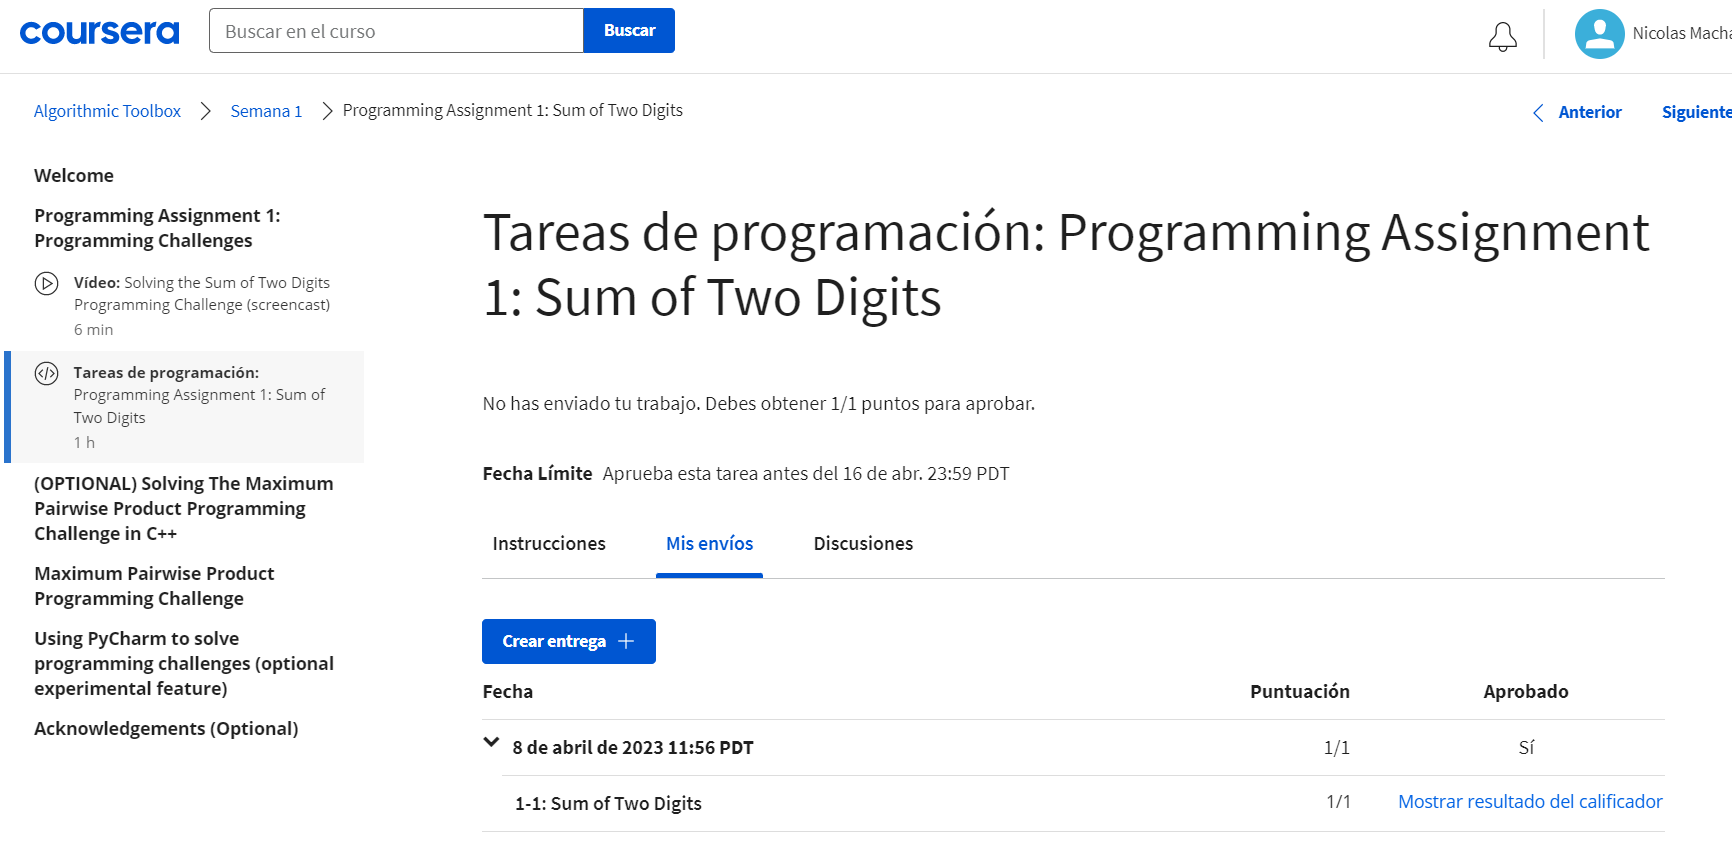

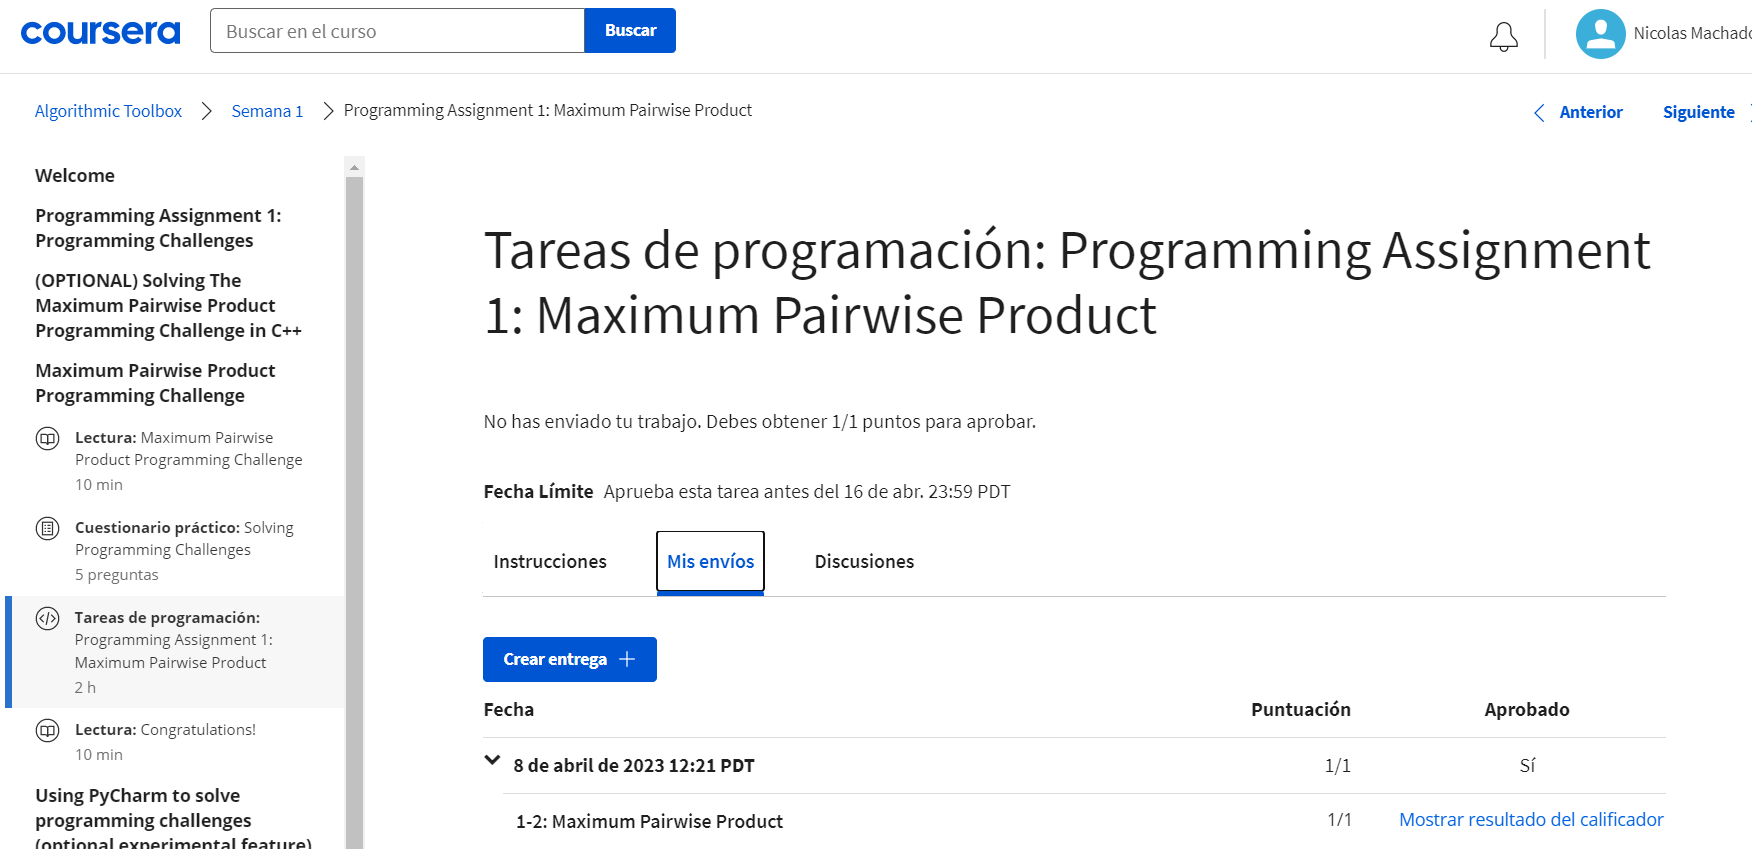

# Codeforces problem https://codeforces.com/contest/1619/problem/A 

Solve the problem in Colab, submit the solution to Codeforces and add a screenshoot of the submission.

In [ ]:
%%writefile codeforcesProblem.cpp
#include <iostream>
#include <string>
using namespace std;

bool checkSquareWord(string &s)
{
    int length = s.length();
    int halfLength = length / 2;
    if (length % 2 == 1)
    {
        return false;
    }
    for (int i = 0; i < halfLength; i++)
    {
        if (s[i] != s[i + halfLength])
        {
            return false;
        }
    }
    return true;
}

int main()
{
    int n = 0;
    cin >> n;

    for (int i = 0; i < n; ++i)
    {
        string s;
        cin >> s;
        if (checkSquareWord(s))
        {
            cout << "YES" << endl;
        }
        else
        {
            cout << "NO" << endl;
        }
    }

    return 0;
}

Overwriting codeforcesProblem.cpp


In [ ]:
%%writefile inputCodeforces.txt
10
a
aa
aaa
aaaa
abab
abcabc
abacaba
xxyy
xyyx
xyxy

Writing inputCodeforces.txt


In [ ]:
!g++ codeforcesProblem.cpp -o codeforcesProblem
!./codeforcesProblem < inputCodeforces.txt

NO
YES
NO
YES
YES
YES
NO
NO
NO
YES


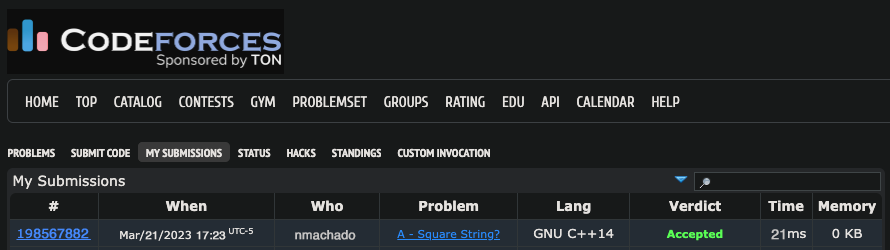